In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, exp


In [44]:

def func_a(x, y):
    return 3 * (1 - x)**2 * exp(-x**2 - (y + 1)**2) - 10 * (x / 5 - x**3 - y**5) * exp(-x**2 - y**2) - 1/3 * exp(-(x + 1)**2 - y**2)
def func_b(x, y):
    return -0.0001 * (abs(sin(x) * sin(y) * exp(abs(100 - ((x**2 + y**2)**0.5) / pi))) + 1)**0.1

# Параметры генетического алгоритма
population_size = 200
gene_length = 10  # Длина хромосомы для каждой переменной
crossover_rate = 0.7
mutation_rate = 0.01
generations = 2000
checkpoints = [50, 500, 1000, 2000]


# Диапазон значений переменных
x_min, x_max = -10, 10
y_min, y_max = -10, 10



In [45]:
def initialize_population(size, dimensions=2):
    return np.random.rand(size, dimensions)

def decode(chromosome):
    x = x_min + (x_max - x_min) * chromosome[0]
    y = y_min + (y_max - y_min) * chromosome[1]
    return x, y

def fitness_maximization(chromosome):
    x, y = decode(chromosome)
    return max(0, given_func(x, y))  # Гарантируем, что значение приспособленности неотрицательно

def fitness_minimization(chromosome):
    x, y = decode(chromosome)
    value = given_func(x, y)
    return 1 / (1 + value) if value > 0 else 1 + abs(value)

def selection(population):
    fitness_values = np.array([fit_func(ind) for ind in population])
    probabilities = fitness_values
    probabilities = (probabilities - (probabilities.min() if (probabilities.min() != np.nan) and (any(probabilities != probabilities.min())) else 0))
    probabilities = probabilities / (probabilities.sum() if probabilities.sum() != 0 else 1)
    chosen_indices = np.random.choice(range(population_size), size=population_size, replace=True, p=probabilities)
    return population[chosen_indices]

def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(0, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

def mutate(chromosome):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] += np.random.normal(0, (x_max - x_min) / 6)
            if chromosome[i] > x_max:
                chromosome[i] = x_max
            if chromosome[i] < x_min:
                chromosome[i] = x_min
    return chromosome




In [46]:
# def get_beta(crossover_parametr):
#     u = np.random.rand()
#     if u <= 0.5:
#         return (2 * u) ** (1 / (crossover_parametr + 1))
#     else:
#         return (1 / (2 * (1 - u))) ** (1 / (crossover_parametr + 1))

# def get_delta(mutation_parametr):
#     r = np.random.rand()
#     if r < 0.5:
#         return (2 * r) ** (1 / (mutation_parametr + 1)) - 1
#     else:
#         return 1 - (2 * (1 - r)) ** (1 / (mutation_parametr + 1))

# def crossover(parent1, parent2, crossover_parametr=np.random.randint(1, 100)):
#     child1, child2 = [], []
#     for i in range(len(parent1)):
#         beta = get_beta(crossover_parametr)
#         child1.append(0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i]))
#         if child1[i] > x_max:
#             child1[i] = x_max
#         elif child1[i] < x_min:
#             child1[i] = x_min
#         child2.append(0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i]))
#         if child2[i] > x_max:
#             child2[i] = x_max
#         elif child2[i] < x_min:
#             child2[i] = x_min
#     return child1, child2

# def mutate(cleen, mutation_parametr=np.random.randint(1, 100)):
#     mutant = []
#     for i in range(len(cleen)):
#         if np.random.rand() < 1 / len(parent1):
#             delta = get_delta(mutation_parametr)
#             mutant.append(cleen[i] + delta * (x_max - x_min))
#             if mutant[i] > x_max:
#                 mutant[i] = x_max
#             elif mutant[i] < x_min:
#                 mutant[i] = x_min
#         else:
#             mutant.append(cleen[i])
#     return mutant

In [47]:
population = initialize_population(population_size)
fit_func = fitness_maximization
given_func = func_a

generation_results_a = {}

for generation in range(generations):
    new_population = []
    population = selection(population)
    for i in range(0, population_size, 2):
        parent1, parent2 = population[i], population[i+1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population = np.array(new_population)
    #     print(given_func(population[2][0], population[2][1]))
    if (generation + 1) in checkpoints:
        generation_results_a[generation + 1] = population

# Определение лучшего решения
best_individual = max(population, key=fit_func)
best_x, best_y = decode(best_individual)
best_fitness = given_func(best_x, best_y)

print(f"Лучшие значения переменных: x = {best_x}, y = {best_y}")
print(f"Максимальное значение функции: {best_fitness}")


Лучшие значения переменных: x = 1.29398995119098, y = 0.02625299263417702
Максимальное значение функции: 3.5884700995661514


In [48]:
population = initialize_population(population_size)
fit_func = fitness_minimization
given_func = func_b

generation_results_b = {}

for generation in range(generations):
    new_population = []
    population = selection(population)
    for i in range(0, population_size, 2):
        parent1, parent2 = population[i], population[i+1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    population = np.array(new_population)
    if (generation + 1) in checkpoints:
        generation_results_b[generation + 1] = population.copy()

# Определение лучшего решения
best_individual = max(population, key=fit_func)
best_x, best_y = decode(best_individual)
best_fitness = given_func(best_x, best_y)

print(f"Лучшие значения переменных: x = {best_x}, y = {best_y}")
print(f"Минимальное значение функции: {best_fitness}")


Лучшие значения переменных: x = -1.4225262934268752, y = 1.1283718213224692
Минимальное значение функции: -2.0557413630028827


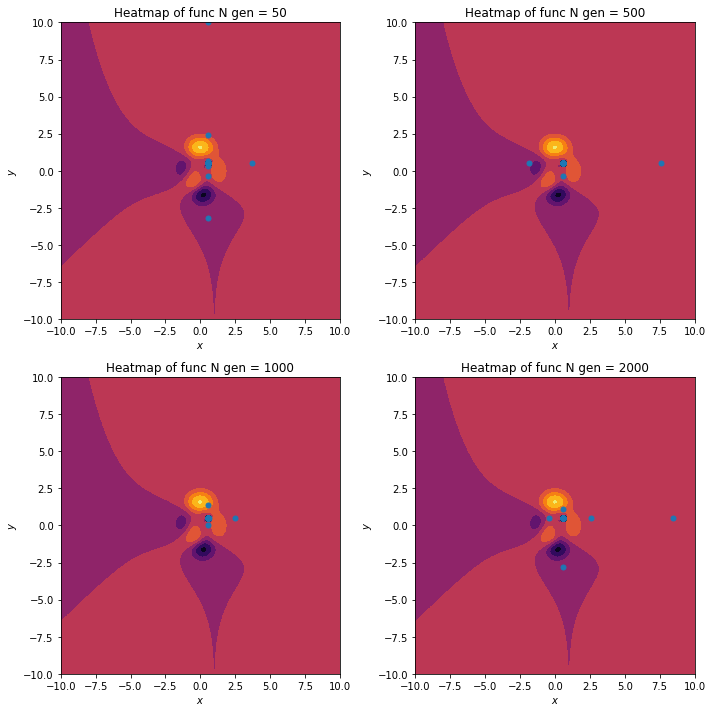

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pareto_fronts(F, generation_results, generation_numbers):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    for i, gen in enumerate(generation_numbers):
        axs[i].contourf(X, Y, F, cmap='inferno')
        axs[i].scatter(generation_results[gen][:,0], generation_results[gen][:,1], s=25)
        #         axs[i].set_colorbar(label='Value of custom function $f(x, y)$')
        axs[i].set_xlabel('$x$')
        axs[i].set_ylabel('$y$')
        axs[i].set_title(f'Heatmap of func N gen = {gen}')
    plt.tight_layout()
    plt.show()

# Define the range
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Apply the custom function to each point in the grid
F_a = [[func_a(x, y) for x, y in zip(x_, y_)] for x_, y_ in zip(X, Y)]

# Plot the heatmap for the custom function
plot_pareto_fronts(F_a, generation_results_a, checkpoints)




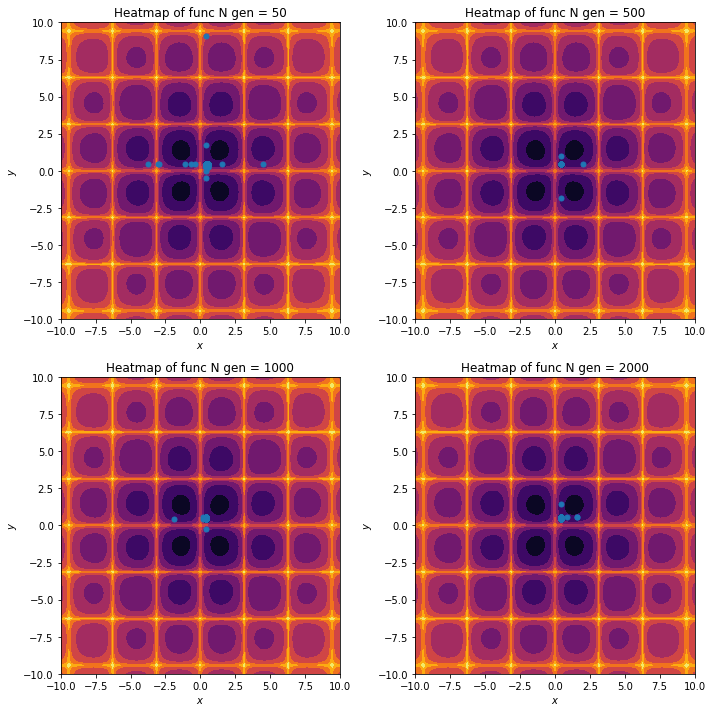

In [58]:
# Apply the custom function to each point in the grid
F_b = [[func_b(x, y) for x, y in zip(x_, y_)] for x_, y_ in zip(X, Y)]

# Plot the heatmap for the custom function
plot_pareto_fronts(F_b, generation_results_b, checkpoints)